In [5]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [11]:
#Import the requests library
import requests
#Import the API key
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c112c21bc455a00523f84cdac771de58


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  
    
    


Processing Record 1 of Set 13 | luderitz
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | nikolskoye
Processing Record 4 of Set 13 | khatanga
Processing Record 5 of Set 13 | bredasdorp
Processing Record 6 of Set 13 | lavrentiya
Processing Record 7 of Set 13 | san patricio
Processing Record 8 of Set 13 | mahebourg
Processing Record 9 of Set 13 | ushuaia
Processing Record 10 of Set 13 | bluff
Processing Record 11 of Set 13 | vardo
Processing Record 12 of Set 13 | rikitea
Processing Record 13 of Set 13 | chokurdakh
Processing Record 14 of Set 13 | arraial do cabo
Processing Record 15 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 13 | guanica
Processing Record 17 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 13 | ribeira grande
Processing Record 19 of Set 13 | matara
Processing Record 20 of Set 13 | saint-philippe
Processing Record 21 of Set 13 | sao gabriel
Processing Record 22 of Set 13 | murray br

Processing Record 39 of Set 16 | hofn
Processing Record 40 of Set 16 | hamilton
Processing Record 41 of Set 16 | lakes entrance
Processing Record 42 of Set 16 | micheweni
Processing Record 43 of Set 16 | san cristobal
Processing Record 44 of Set 16 | marzuq
Processing Record 45 of Set 16 | marsa matruh
Processing Record 46 of Set 16 | colonia
Processing Record 47 of Set 16 | gumdag
Processing Record 48 of Set 16 | puerto maldonado
Processing Record 49 of Set 16 | fortuna
Processing Record 50 of Set 16 | henties bay
Processing Record 1 of Set 17 | yuyao
Processing Record 2 of Set 17 | atikokan
Processing Record 3 of Set 17 | namatanai
Processing Record 4 of Set 17 | berbera
Processing Record 5 of Set 17 | grand-santi
Processing Record 6 of Set 17 | iskateley
Processing Record 7 of Set 17 | sitka
Processing Record 8 of Set 17 | alexandria
Processing Record 9 of Set 17 | bouna
Processing Record 10 of Set 17 | sassandra
Processing Record 11 of Set 17 | lagoa
Processing Record 12 of Set 17 

Processing Record 25 of Set 20 | ranong
Processing Record 26 of Set 20 | lebu
Processing Record 27 of Set 20 | rantepao
Processing Record 28 of Set 20 | rungata
City not found. Skipping...
Processing Record 29 of Set 20 | tommot
Processing Record 30 of Set 20 | los llanos de aridane
Processing Record 31 of Set 20 | la orilla
Processing Record 32 of Set 20 | windsor
Processing Record 33 of Set 20 | waw
Processing Record 34 of Set 20 | sagua de tanamo
Processing Record 35 of Set 20 | zorritos
Processing Record 36 of Set 20 | yola
Processing Record 37 of Set 20 | lac du bonnet
Processing Record 38 of Set 20 | roches noires
City not found. Skipping...
Processing Record 39 of Set 20 | thinadhoo
Processing Record 40 of Set 20 | ust-koksa
Processing Record 41 of Set 20 | meulaboh
Processing Record 42 of Set 20 | sainte-maxime
Processing Record 43 of Set 20 | uspenka
Processing Record 44 of Set 20 | avera
Processing Record 45 of Set 20 | azare
Processing Record 46 of Set 20 | douglas
Processin

Processing Record 12 of Set 24 | coffs harbour
Processing Record 13 of Set 24 | taloqan
Processing Record 14 of Set 24 | karaul
City not found. Skipping...
Processing Record 15 of Set 24 | fonte boa
Processing Record 16 of Set 24 | nampula
Processing Record 17 of Set 24 | raga
Processing Record 18 of Set 24 | safford
Processing Record 19 of Set 24 | chiguiri arriba
City not found. Skipping...
Processing Record 20 of Set 24 | kohlu
Processing Record 21 of Set 24 | san rafael
Processing Record 22 of Set 24 | honningsvag
Processing Record 23 of Set 24 | kodinsk
Processing Record 24 of Set 24 | port hedland
Processing Record 25 of Set 24 | brae
Processing Record 26 of Set 24 | half moon bay
Processing Record 27 of Set 24 | shimoda
Processing Record 28 of Set 24 | tasbuget
City not found. Skipping...
Processing Record 29 of Set 24 | jamame
Processing Record 30 of Set 24 | eslov
Processing Record 31 of Set 24 | okato
Processing Record 32 of Set 24 | hobyo
Processing Record 33 of Set 24 | rio

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.65,15.16,66.88,45,0,24.00,NA,2020-10-31 18:37:17
1,Mataura,-46.19,168.86,48.99,77,8,5.01,NZ,2020-10-31 18:37:17
2,Nikolskoye,59.70,30.79,39.99,82,98,4.47,RU,2020-10-31 18:33:07
3,Khatanga,71.97,102.50,-7.80,87,57,7.02,RU,2020-10-31 18:37:17
4,Bredasdorp,-34.53,20.04,57.20,71,0,6.93,ZA,2020-10-31 18:37:17
5,Lavrentiya,65.58,-171.00,19.83,92,40,7.81,RU,2020-10-31 18:33:40
6,San Patricio,28.02,-97.52,78.01,50,40,3.69,US,2020-10-31 18:33:29
7,Mahebourg,-20.41,57.70,68.00,77,20,6.93,MU,2020-10-31 18:32:54
8,Ushuaia,-54.80,-68.30,55.40,58,75,5.82,AR,2020-10-31 18:37:18
9,Bluff,-46.60,168.33,48.99,77,86,5.01,NZ,2020-10-31 18:32:46


In [19]:
#Reoder columns in for ease of reading
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2020-10-31 18:37:17,-26.65,15.16,66.88,45,0,24.00
1,Mataura,NZ,2020-10-31 18:37:17,-46.19,168.86,48.99,77,8,5.01
2,Nikolskoye,RU,2020-10-31 18:33:07,59.70,30.79,39.99,82,98,4.47
3,Khatanga,RU,2020-10-31 18:37:17,71.97,102.50,-7.80,87,57,7.02
4,Bredasdorp,ZA,2020-10-31 18:37:17,-34.53,20.04,57.20,71,0,6.93
5,Lavrentiya,RU,2020-10-31 18:33:40,65.58,-171.00,19.83,92,40,7.81
6,San Patricio,US,2020-10-31 18:33:29,28.02,-97.52,78.01,50,40,3.69
7,Mahebourg,MU,2020-10-31 18:32:54,-20.41,57.70,68.00,77,20,6.93
8,Ushuaia,AR,2020-10-31 18:37:18,-54.80,-68.30,55.40,58,75,5.82
9,Bluff,NZ,2020-10-31 18:32:46,-46.60,168.33,48.99,77,86,5.01


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604169514.0171914

In [23]:
today =  time.strftime("%x")
today

'10/31/20'

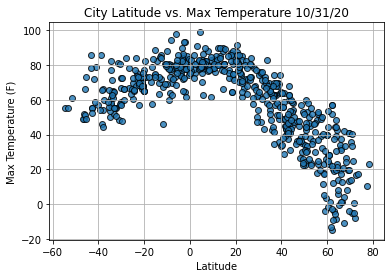

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

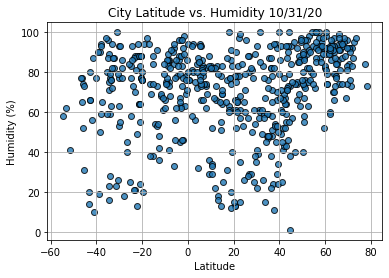

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


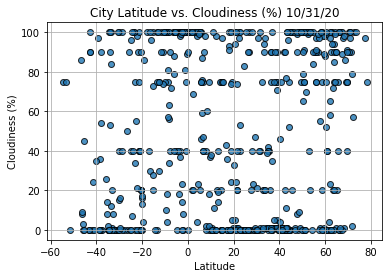

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

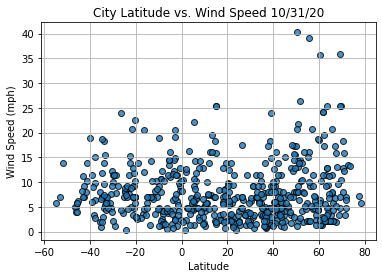

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [63]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [64]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [65]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [66]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

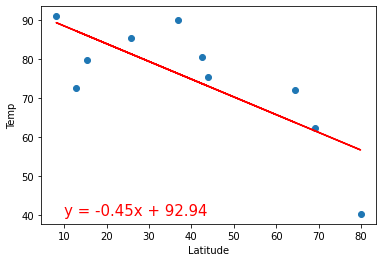

In [67]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [28]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [29]:
index13 = city_data_df.loc[13]
index13

City              Arraial Do Cabo
Country                        BR
Date          2020-10-31 18:36:35
Lat                        -22.97
Lng                        -42.03
Max Temp                     71.6
Humidity                       88
Cloudiness                     75
Wind Speed                  11.41
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
560     True
561    False
562     True
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Nikolskoye,RU,2020-10-31 18:33:07,59.70,30.79,39.99,82,98,4.47
3,Khatanga,RU,2020-10-31 18:37:17,71.97,102.50,-7.80,87,57,7.02
5,Lavrentiya,RU,2020-10-31 18:33:40,65.58,-171.00,19.83,92,40,7.81
6,San Patricio,US,2020-10-31 18:33:29,28.02,-97.52,78.01,50,40,3.69
10,Vardo,NO,2020-10-31 18:35:59,70.37,31.11,35.94,84,100,18.23
...,...,...,...,...,...,...,...,...,...
558,At-Bashi,KG,2020-10-31 18:38:22,41.17,75.81,28.74,60,0,4.54
559,Gushikawa,JP,2020-10-31 18:38:22,26.35,127.87,73.40,88,90,6.93
560,Bella Vista,US,2020-10-31 18:38:23,36.43,-94.23,61.00,38,1,13.87
562,Vila Franca Do Campo,PT,2020-10-31 18:38:23,37.72,-25.43,69.80,94,75,17.22


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


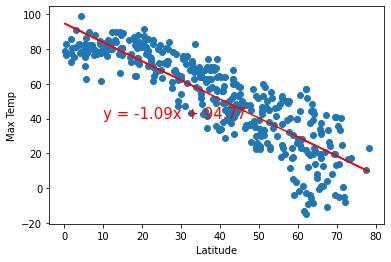

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

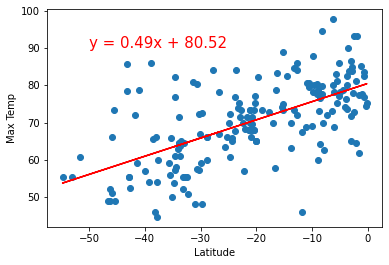

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


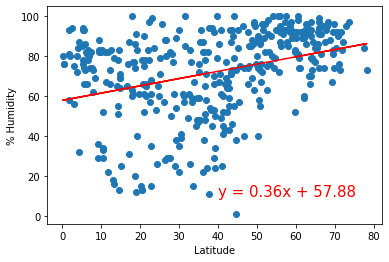

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

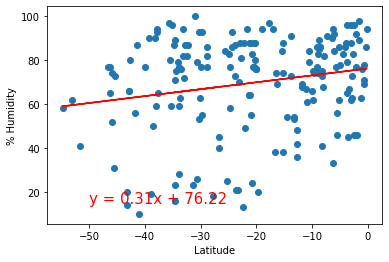

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

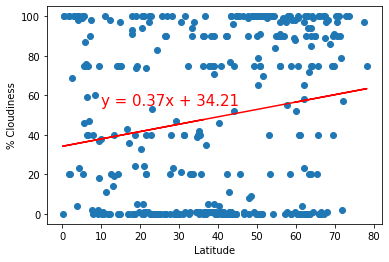

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

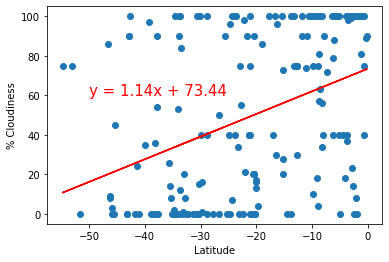

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

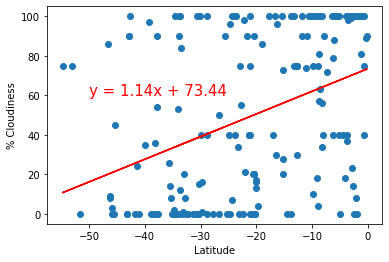

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


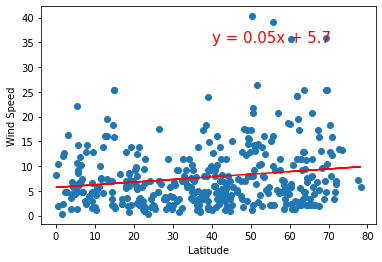

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


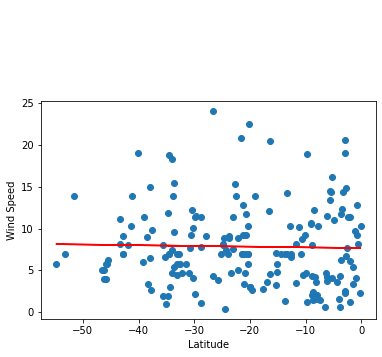

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
